In [2]:
%pylab inline
import torch
import torch.nn.functional as F
import numpy as np
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

Populating the interactive namespace from numpy and matplotlib


Notes from the [Deep Learning Book](https://www.deeplearningbook.org/)

# Ch.7 Regularization for Deep Learning

### 7.1 Parameter Norm Penalties

$$\renewcommand\vec{\boldsymbol}$$


Many regularization approaches are based on limiting the capacity of models, such as neural networks, linear regression, or logistic regression, by adding a parameter norm penalty $\Omega (\vec {\theta})$ to the objective function $J$. We denote the regularized objective function by $\tilde J$:

$$\tilde J(\vec{\theta} ; \vec X , \vec y) = J(\vec{\theta} ; \vec X , \vec y) + \alpha \Omega (\vec{\theta})$$

Before delving into the regularization behavior of different norms, we note that for neural networks, we typically choose to use a parameter norm penalty $\Omega$ that penalizes **only the weights** of the affine transformation at each layer, and leaves the biases unregularized. Regularizing the bias parameters can introduce a significant amount of underfitting. We therefore use the vector $\vec{\omega}$ to indicate all the weights that should be affected by a norm penalty, while the vector $\vec{\theta}$ denotes all the parameters.

### 7.1.1 $L^2$ Parameter Regularization

One of the simplest and most common kinds of parameter norm penalty is the $L^2$ parameter norm penalty commonly known as **weight decay**. This regularization strategy drives the weights close to the origin by adding a regularization term $\Omega(\vec{\theta}) = \frac 1 2 \parallel \vec{\omega} \parallel_2^2$ to the objective function.


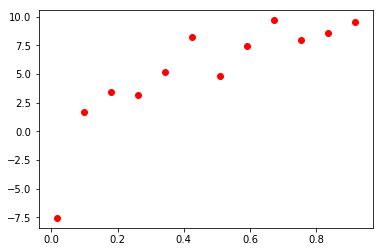

In [124]:
np.random.seed(123)
ln = lambda x: 4*log(x) + 10
x = np.array([linspace(0.1,6.1,12, endpoint = False)]).T/6.1
y = ln(x) + 1.0*randn(12,1)
scatter(x[:,0],y[:,0], color="r");

0 587.956237793
1000 11.6985750198
2000 10.7421293259
3000 2.56788444519
4000 0.481240868568
5000 0.0126521643251
6000 0.00156842032447
7000 2.46649797191e-05
8000 3.76451282591e-07
9000 7.59865770306e-09
9999 9.38769062486e-10


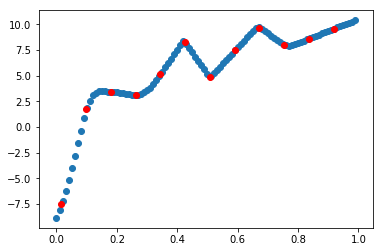

In [71]:
torch.manual_seed(138)

class NeuralNet(torch.nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.W1 = torch.nn.Linear(1, 128)
        self.W2 = torch.nn.Linear(128, 128)
        self.W3 = torch.nn.Linear(128, 128)
        self.W4 = torch.nn.Linear(128, 1)

    def forward(self, x):
        out = self.W4(F.relu(self.W3(F.relu(self.W2(F.relu(self.W1(x)))))))
        return out


model = NeuralNet()

x_t = torch.tensor(x, device=device, dtype = dtype)
y_t = torch.tensor(y, device=device, dtype = dtype)
loss_fn = torch.nn.MSELoss(reduction='sum')

optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, weight_decay=0, momentum = 0.9)
for t in range(10000):

    y_pred = model(x_t)

    loss = loss_fn(y_pred, y_t)
    if t%1000 == 0:
        print t, loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print t, loss.item()
    
x_test = np.array([np.arange(100)/100.0]).T
x_pred = torch.tensor(x_test, device=device, dtype = dtype)
y_pred = model(x_pred)
#print list(model.named_parameters())
scatter(x_pred[:,0].tolist(),y_pred[:,0].tolist())
scatter(x[:,0],y[:,0], color="r");

0 513.48828125
10000 13.4597406387
20000 12.8130626678
30000 11.8477668762
40000 5.45657491684
50000 1.30145061016
60000 0.175714746118
70000 0.0933856666088
80000 0.0533940196037
90000 0.0319392681122
99999 0.0200643856078


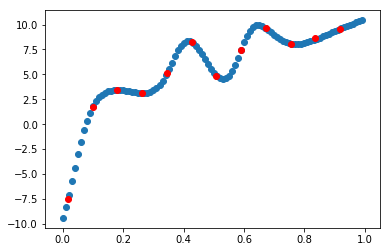

In [148]:
torch.manual_seed(133)

class NeuralNet(torch.nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.W1 = torch.nn.Linear(1, 12)
        self.W4 = torch.nn.Linear(12, 1)

    def forward(self, x):
        out = self.W4(F.sigmoid(self.W1(x)))
        return out


model = NeuralNet()

x_t = torch.tensor(x, device=device, dtype = dtype)
y_t = torch.tensor(y, device=device, dtype = dtype)
loss_fn = torch.nn.MSELoss(reduction='sum')

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=0.0, momentum = 0.9)
for t in range(100000):

    y_pred = model(x_t)
    
    loss = loss_fn(y_pred, y_t)
    if t%10000 == 0:
        print t, loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print t, loss.item()
    
x_test = np.array([np.arange(100)/100.0]).T
x_pred = torch.tensor(x_test, device=device, dtype = dtype)
y_pred = model(x_pred)
scatter(x_pred[:,0].tolist(),y_pred[:,0].tolist())
scatter(x[:,0],y[:,0], color="r");

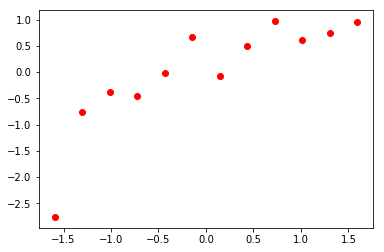

In [154]:
np.random.seed(123)
ln = lambda x: 4*log(x) + 10
x = np.array([linspace(0.1,6.1,12, endpoint = False)]).T/6.1
y = ln(x) + 1.0*randn(12,1)
from sklearn.preprocessing import StandardScaler
x_s = StandardScaler().fit_transform(x)
y_s = StandardScaler().fit_transform(y)
scatter(x_s[:,0],y_s[:,0], color="r");

0 18.0521621704
10000 0.315595120192
20000 0.168673112988
30000 0.0770069435239
40000 0.0251476801932
49999 0.00601843418553


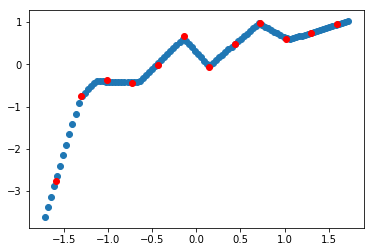

In [173]:
torch.manual_seed(133)

class NeuralNet(torch.nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.W1 = torch.nn.Linear(1, 24) #23 doesn't work
        self.W4 = torch.nn.Linear(24, 1)

    def forward(self, x):
        out = self.W4(F.relu(self.W1(x)))
        return out


model = NeuralNet()

x_t = torch.tensor(x_s, device=device, dtype = dtype)
y_t = torch.tensor(y_s, device=device, dtype = dtype)
loss_fn = torch.nn.MSELoss(reduction='sum')

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
for t in range(50000):

    y_pred = model(x_t)
    
    loss = loss_fn(y_pred, y_t)
    if t%10000 == 0:
        print t, loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print t, loss.item()
    
x_test = StandardScaler().fit_transform(np.array([np.arange(100)/100.0]).T)
x_pred = torch.tensor(x_test, device=device, dtype = dtype)
y_pred = model(x_pred)
scatter(x_pred[:,0].tolist(),y_pred[:,0].tolist())
scatter(x_s[:,0],y_s[:,0], color="r");

0 513.48828125
1000 33.7751693726
2000 31.1093463898
3000 29.0856819153
4000 27.7554321289
5000 27.1281814575
6000 26.8888225555
7000 26.7986831665
8000 26.7584266663
9000 26.7359027863
9999 26.7210998535


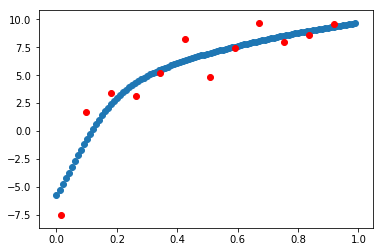

In [93]:
torch.manual_seed(133)

class NeuralNet(torch.nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.W1 = torch.nn.Linear(1, 12)
        self.W4 = torch.nn.Linear(12, 1)

    def forward(self, x):

        out = self.W4(F.sigmoid(self.W1(x)))
        return out


model = NeuralNet()

x_t = torch.tensor(x, device=device, dtype = dtype)
y_t = torch.tensor(y, device=device, dtype = dtype)
loss_fn = torch.nn.MSELoss(reduction='sum')

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=0.1, momentum = 0.9)
for t in range(10000):
    optimizer.zero_grad()
    y_pred = model(x_t)
    
    loss = loss_fn(y_pred, y_t)
    if t%1000 == 0:
        print t, loss.item()
    

    loss.backward()
    optimizer.step()
    
print t, loss.item()
    
x_test = np.array([np.arange(100)/100.0]).T
x_pred = torch.tensor(x_test, device=device, dtype = dtype)
y_pred = model(x_pred)
scatter(x_pred[:,0].tolist(),y_pred[:,0].tolist())
scatter(x[:,0],y[:,0], color="r");

0 513.48828125
1000 33.7751693726
2000 31.1093463898
3000 29.0856819153
4000 27.7554321289
5000 27.1281814575
6000 26.8888225555
7000 26.7986831665
8000 26.7584266663
9000 26.7359027863
9999 26.7210998535


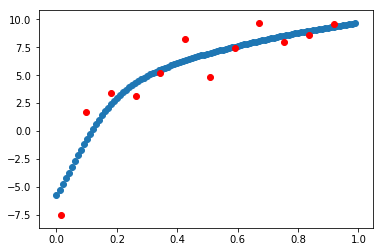

In [113]:
torch.manual_seed(133)

class NeuralNet(torch.nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.W1 = torch.nn.Linear(1, 12)
        self.W4 = torch.nn.Linear(12, 1)

    def forward(self, x):

        out = self.W4(F.sigmoid(self.W1(x)))
        return out


model = NeuralNet()

x_t = torch.tensor(x, device=device, dtype = dtype)
y_t = torch.tensor(y, device=device, dtype = dtype)
loss_fn = torch.nn.MSELoss(reduction='sum')

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=0.0, momentum = 0.9)
for t in range(10000):
    optimizer.zero_grad()
    y_pred = model(x_t)
    
    loss = loss_fn(y_pred, y_t)
    if t%1000 == 0:
        print t, loss.item()
    my_lambda = torch.tensor(0.1)
    l2_reg = torch.tensor(0.)

    for param in model.parameters():

        l2_reg += torch.pow(param, 2).sum()

    loss += 0.5*my_lambda * l2_reg

    loss.backward()
    optimizer.step()
    
print t, loss.item() - (0.5*my_lambda * l2_reg).item()
    
x_test = np.array([np.arange(100)/100.0]).T
x_pred = torch.tensor(x_test, device=device, dtype = dtype)
y_pred = model(x_pred)
scatter(x_pred[:,0].tolist(),y_pred[:,0].tolist())
scatter(x[:,0],y[:,0], color="r");

0 513.48828125
1000 33.5673217773
2000 31.5899353027
3000 30.2648963928
4000 29.1213874817
5000 28.2289791107
6000 27.6435184479
7000 27.2717494965
8000 27.0402908325
9000 26.905122757
9999 26.828168869


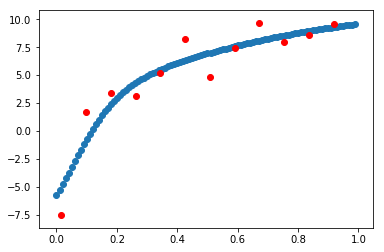

In [115]:
torch.manual_seed(133)

class NeuralNet(torch.nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.W1 = torch.nn.Linear(1, 12)
        self.W4 = torch.nn.Linear(12, 1)

    def forward(self, x):

        out = self.W4(F.sigmoid(self.W1(x)))
        return out


model = NeuralNet()

x_t = torch.tensor(x, device=device, dtype = dtype)
y_t = torch.tensor(y, device=device, dtype = dtype)
loss_fn = torch.nn.MSELoss(reduction='sum')

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=0.0, momentum = 0.9)
for t in range(10000):
    optimizer.zero_grad()
    y_pred = model(x_t)
    
    loss = loss_fn(y_pred, y_t)
    if t%1000 == 0:
        print t, loss.item()
    my_lambda = torch.tensor(0.1)
    l2_reg = torch.tensor(0.)

    for name, param in model.named_parameters():

        if 'bias' in name:
            continue
        l2_reg += torch.pow(param, 2).sum()

    loss += 0.5*my_lambda * l2_reg

    loss.backward()
    optimizer.step()
    
print t, loss.item() - (0.5*my_lambda * l2_reg).item()
    
x_test = np.array([np.arange(100)/100.0]).T
x_pred = torch.tensor(x_test, device=device, dtype = dtype)
y_pred = model(x_pred)
scatter(x_pred[:,0].tolist(),y_pred[:,0].tolist())
scatter(x[:,0],y[:,0], color="r");

0 513.48828125
1000 33.5673217773
2000 31.5899353027
3000 30.2648963928
4000 29.1213874817
5000 28.2289791107
6000 27.6435184479
7000 27.2717494965
8000 27.0402908325
9000 26.905122757
9999 26.8281669617


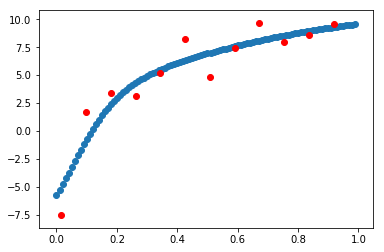

In [123]:
torch.manual_seed(133)

class NeuralNet(torch.nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.W1 = torch.nn.Linear(1, 12)
        self.W4 = torch.nn.Linear(12, 1)

    def forward(self, x):

        out = self.W4(F.sigmoid(self.W1(x)))
        return out


model = NeuralNet()

x_t = torch.tensor(x, device=device, dtype = dtype)
y_t = torch.tensor(y, device=device, dtype = dtype)
loss_fn = torch.nn.MSELoss(reduction='sum')

weights, biases = [], []
for name, p in model.named_parameters():
    if 'bias' in name:
        biases += [p]
    else:
        weights += [p]

optimizer =  torch.optim.SGD([
  {'params': weights},
  {'params': biases, 'weight_decay':0.0}
], lr=1e-3, momentum=0.9, weight_decay=0.1)

# torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=0.0, momentum = 0.9)
for t in range(10000):
    optimizer.zero_grad()
    y_pred = model(x_t)
    
    loss = loss_fn(y_pred, y_t)
    if t%1000 == 0:
        print t, loss.item()


    loss.backward()
    optimizer.step()
    
print t, loss.item()
    
x_test = np.array([np.arange(100)/100.0]).T
x_pred = torch.tensor(x_test, device=device, dtype = dtype)
y_pred = model(x_pred)
scatter(x_pred[:,0].tolist(),y_pred[:,0].tolist())
scatter(x[:,0],y[:,0], color="r");

### 7.1.2 $L^1$ Parameter Regularization

Formally, $L^1$ regularization on the model parameter $\vec{\omega}$ is defined as

$$ \Omega(\vec{\theta}) = \parallel \vec {\omega} \parallel_1 = \sum_i |\omega_i|$$

In comparison to $L^2$ regularization, $L^1$ regularization results in a solution that is more sparse which has been used extensively as a *feature selection* mechanism.

49999 16.3571586609
Parameter containing:
tensor([[ 4.6792e-04],
        [-8.1578e-05],
        [ 7.1028e-04],
        [ 1.0250e-03],
        [-2.1679e+01],
        [ 9.2969e-04],
        [ 6.9496e-06],
        [-6.1655e-05],
        [ 5.4006e-04],
        [-2.6932e-05],
        [-1.1749e-04],
        [ 3.6621e+00]], requires_grad=True)
Parameter containing:
tensor([-0.0001, -0.0002,  0.0005, -0.0002,  0.6066, -0.0004, -0.0006,  0.0003,
         0.0005,  0.0004,  0.0004, -1.1218], requires_grad=True)
Parameter containing:
tensor([[ 2.0998e-04, -3.0892e-04, -3.1434e-04,  7.8459e-04, -1.6459e+01,
          8.3955e-04,  3.4361e-04,  2.3368e-04,  1.0822e-03, -1.4865e-07,
         -5.4141e-04,  1.0166e+01]], requires_grad=True)
Parameter containing:
tensor([0.0011], requires_grad=True)


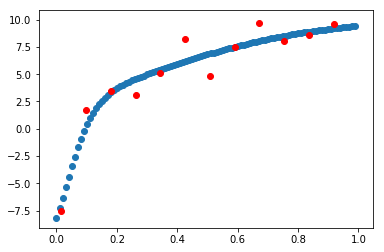

In [135]:
torch.manual_seed(133)

class NeuralNet(torch.nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.W1 = torch.nn.Linear(1, 12)
        self.W4 = torch.nn.Linear(12, 1)

    def forward(self, x):

        out = self.W4(F.sigmoid(self.W1(x)))
        return out


model = NeuralNet()

x_t = torch.tensor(x, device=device, dtype = dtype)
y_t = torch.tensor(y, device=device, dtype = dtype)
loss_fn = torch.nn.MSELoss(reduction='sum')

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=0.0, momentum = 0.9)
for t in range(50000):
    optimizer.zero_grad()
    y_pred = model(x_t)
    
    loss = loss_fn(y_pred, y_t)
#     if t%1000 == 0:
#         print t, loss.item()
    my_lambda = torch.tensor(0.5)
    l1_reg = torch.tensor(0.)


    for param in model.parameters():
        l1_reg += torch.sum(torch.abs(param))

    loss += my_lambda * l1_reg

    loss.backward()
    optimizer.step()
    
print t, loss.item() - (my_lambda * l1_reg).item()
    
x_test = np.array([np.arange(100)/100.0]).T
x_pred = torch.tensor(x_test, device=device, dtype = dtype)
y_pred = model(x_pred)
for param in model.parameters():
    print param
scatter(x_pred[:,0].tolist(),y_pred[:,0].tolist())
scatter(x[:,0],y[:,0], color="r");

### 7.4 Dataset Augmentation

The best way to make a machine learning model generalize better is to train it on more data. Of course, in practice, the amount of data we have is limited. One way to get around this problem is to create fake data and add it to the training set.

Dataset augmentation has been a particularly effective technique for object recognition. Operations like translating the training images a fex pixels in each direction can often greatly improve generalization.

Injecting noise in the input to a neural network can also be a form of data augmentation. Input noise injection is part of some unsupervised learning algorithms, such as the denoising autoencoder. 

Noise injection also works when the noise is applied to the hidden units.

### 7.5.1 Injecting Noise at the Output Targets

Most datasets have some number of mistakes in the $y$ labels. It can be harmful to maximize $\log p(y | \vec x)$ when $y$ is a mistake. One way to prevent this is to explicitly model the noise on the labels. For example, we can assume that for some small constant $\epsilon$, the training set label $y$ is correct with probability $1-\epsilon$, and otherwise any of the other possible labels might be correct. *Label Smoothing* regularizes a model based on a softmax with k output values by replacing the hard 0 and 1 classification targets with targets of $\frac {\epsilon} {k - 1}$ and $1-\epsilon$, respectively.

### 7.8 Early Stopping

When training large models with sufficient representational capacity to overfit the task, we often observe that training error decreases steadily over time, but validation set error begins to rise again.

Therefore, return the model with the best validation set error!

### 7.9 Parameter Tying and Parameter Sharing

Let us imagine that two tasks are similar enough (perhaps with similar input and output distributions) that we believe the model parameters should be close to each other. We can use a parameter norm penalty to ensure closeness.

While a parameter norm penalty is one way to regularize parameters to be close to each other, the more popular way is to set the parameters equal to each other. This method of regularization is often referred to as *parameter sharing*.

### 7.9.1 Convolutional Neural Networks

By far the most popular and extensive use of parameter sharing occurs in CNNs applied to computer vision.

Natural images have many statistical properties that are invariant to translation. CNNs take this property into account by sharing parameters across multiple image locations. The same feature (a hidden unit with the same weights) is computed over different locations in the input. 

### 7.12 Dropout

**Dropout** [(Srivastava, 2014)](http://www.jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf) provides a computationally inexpensive but powerful method of regularizing a broad family of models. To a first approximation, dropout can be thought of as a method of making bagging practical for ensembles of very many large neural networks. Bagging involves training multiple models and evaluating multiple models on each test example. Dropout provides an inexpensive approximation to training and evaluating a bagged ensemble of exponentially many neural networks.

Dropout trains an ensemble consisting if all subnetworks that can be constructed by removing nonoutput units from an underlying base network. With a base network with two visible units (i.e., the inputs) and two hidden units, there are 16 possible subsets of these four units. In this small example, a large proportion of the resulting networks have no input units or no path connecting the input to the output. This problem becomes insignificant for networks with wider layers, where the probability of dropping all possible paths from inputs to outputs becomes smaller.

In most modern neural networks, based on a series of affine transformations and nonlinearities, we can effectively remove a unit from a network by multiplying its output value by zero. 

Recall that to learn with bagging, we define $k$ different models, construct $k$ different datasets by sampling from the training set with replacement, and then train model $i$ on dataset $i$. To train with dropout, we use a minibatch-based learning algorithm that makes small steps, such as stochastic gradient descent. Each time we load an example into a minibatch, we randomly sample a different binary mask to apply to all the input and hidden units in the network. The probability of sampling a mask value of one (causing a unit to be included) is a hyperparameter fixed before training begins. Typically, an input unit is included with probability 0.8, and a hidden unit is included with probability 0.5.

More formally, suppose that a mask vector $\vec {\mu}$ specifies which units to include, and $J(\vec {\theta}, \vec {\mu})$ defines the cost of the model defined by parameters $\vec{\theta}$ and mask $\vec {\mu}$. Then dropout training consists of minimizing $\mathbb{E}_{\vec {\mu}} J(\vec {\theta}, \vec {\mu}) $. The expectation contains exponentially many terms, but we can obtain an unbiased estimate of its gradient by sampling values of $\vec {\mu}$. 

To make a prediction, a bagged ensemble must accumulate votes from all its members. We refer to this process as **inference** in this context. 

We assume that that the model's role is to output a probability distribution. Each submodel defined by mask vector $\vec {\mu}$ defines a probability distribution $p(y ~ | ~ \vec x , ~ \vec{\mu})$. The arithmetic mean over all masks is given by

$$ \sum_{\vec {\mu}} p(\vec {\mu}) ~ p(y ~ | ~ \vec x, ~ \vec {\mu})$$

where $p(\vec {\mu})$ is the probability distribution that was used to sample $\vec {\mu}$ at training time.

Because the sum includes an exponential number of terms, it is in general intractable. Instead, we can approximate the inference with sampling, by averaging together the output of many masks. Even 10-20 masks are often sufficient to obtain good performance.

A key insight [(Hinton, 2012)](https://arxiv.org/pdf/1207.0580.pdf) involved in dropout is that we can approximate $p_{\text {ensemble}}$ by evaluating $p(y ~ | ~ \vec x)$ in one model: the model with all units, but with the weights going out of unit $i$ multiplied by the probability of including unit $i$. The motivation for this modification is to capture the right expected value of the output from that unit. We call this approach the **weight scaling inference rule** . Because we usually use an inclusion probability of $\frac 1 2$, the weight scaling rule usually amounts to dividing the weights by 2 at the end of training, and then using the model as usual.

It is important to understand that a large portion of the power of dropout arises because dropout can be seen as a form of highly intelligent, adaptive destruction of the information content of the input rather than destruction of the raw values of the input. For example, if the mofel learns a hidden unit that detects a face by finding the nose, then dropping that hidden unit corresponds to erasing the information that there is a nose in the image. The model must learn another feature, that either redundantly encodes the presence of a nose or detects the face by another feature, such as the mouth. Traditional noise injection techniques that add unstructured noise at the input are not able to randomly erase information about a nose from an image of a face unless the magnitude of the noise is so great that nearly all the information in the image is removed.

0 517.267211914
10000 41.4759674072
20000 27.296754837
30000 51.1579551697
40000 47.6874885559
50000 51.4489631653
60000 56.8360404968
70000 108.59538269
80000 61.7290687561
90000 39.4688568115
final loss 17.4539051056


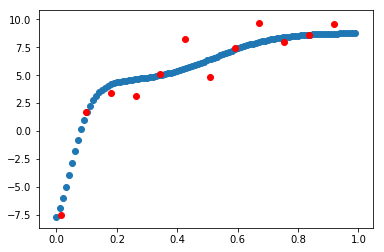

In [146]:
torch.manual_seed(133)

model = torch.nn.Sequential(
    torch.nn.Linear(1,12),
    torch.nn.Sigmoid(),
    torch.nn.Dropout(0.6),
    torch.nn.Linear(12,1)
)

x_t = torch.tensor(x, device=device, dtype = dtype)
y_t = torch.tensor(y, device=device, dtype = dtype)
loss_fn = torch.nn.MSELoss(reduction='sum')

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=0.0, momentum = 0.9)

model.train()
for t in range(100000):

    y_pred = model(x_t)
    
    loss = loss_fn(y_pred, y_t)
    if t%10000 == 0:
        print t, loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

model.eval()   
y_pred = model(x_t)
loss = loss_fn(y_pred, y_t)
print "final loss", loss.item()
    
x_test = np.array([np.arange(100)/100.0]).T
x_pred = torch.tensor(x_test, device=device, dtype = dtype)
y_pred = model(x_pred)
scatter(x_pred[:,0].tolist(),y_pred[:,0].tolist())
scatter(x[:,0],y[:,0], color="r");